In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from warnings import simplefilter
simplefilter('ignore')
from pathlib import Path

In [3]:
# Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True, figsize = (11,8))
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)


In [4]:
# load the dataset
data_dir = Path("../input/fe-course-data")
df = pd.read_csv(data_dir / "housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X = df.loc[:,['MedInc','Latitude','Longitude']]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [21]:
# create cluster feature
kmeans = KMeans(n_clusters = 6)
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')
X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,2


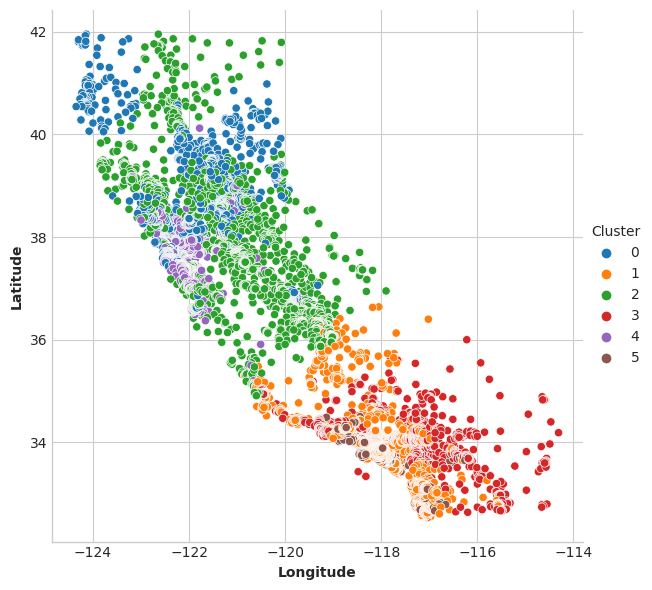

In [22]:
sns.relplot(x = 'Longitude', y = 'Latitude', hue = 'Cluster', data = X, height = 6)

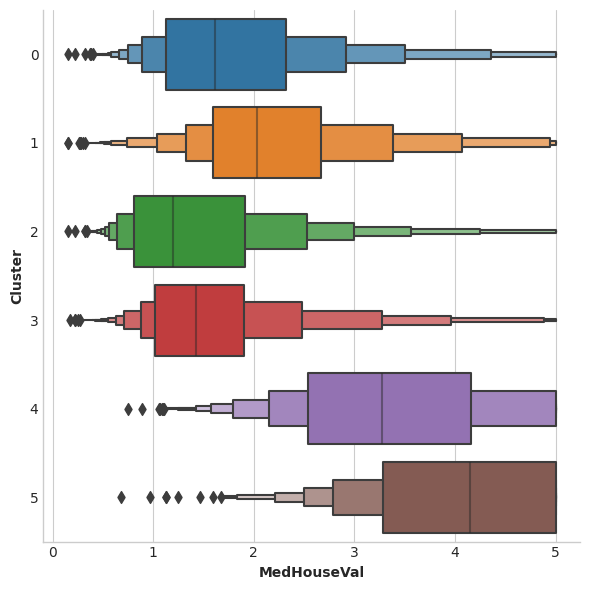

In [24]:
X['MedHouseVal'] = df['MedHouseVal']
sns.catplot(x = 'MedHouseVal', y = 'Cluster', data = X, kind = 'boxen', height = 6)